In [28]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math as math
import nsfg

In [29]:
preg = nsfg.ReadFemPreg()

live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
cols = ['agepreg', 'totalwgt_lb']
live = live[cols]

In [30]:
live.head()

,agepreg,totalwgt_lb
0,33.16,8.8125
1,39.25,7.8750
2,14.33,9.1250
3,17.83,7.0000
4,18.33,6.1875


In [31]:
# bin the agepreg:
bins =[0]
bins += range(12,50,1)
print len(bins)

labels = [i for i in bins[1:]]
print len(labels)
live['age_cat'] = pd.cut(live.agepreg,bins,labels=labels)

39
38


In [32]:
live.head()

,agepreg,totalwgt_lb,age_cat
0,33.16,8.8125,34
1,39.25,7.8750,40
2,14.33,9.1250,15
3,17.83,7.0000,18
4,18.33,6.1875,19


38
38


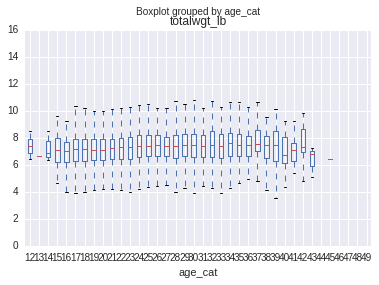

In [33]:
groupy = live.groupby('age_cat')

q_list=[]
for i in [25,50,75]:
     q_list.append( groupy.quantile(i/100))

print len(q_list[0])
print len(labels)

live.boxplot('totalwgt_lb',by='age_cat')


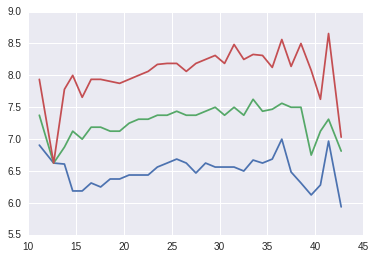

In [34]:
for q in q_list:
    plt.plot(groupy.agepreg.mean(),q.totalwgt_lb)

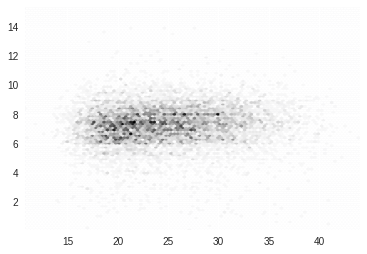

In [35]:
plt.hexbin(live.agepreg,live.totalwgt_lb)

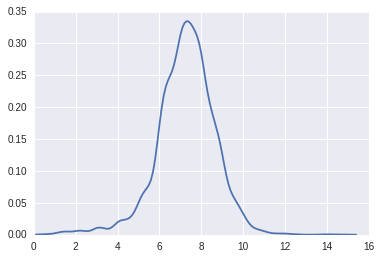

In [60]:
#plot a kerner density for totalweight
live = live.sort_values(by='agepreg')
live['rounded_weight']=np.around(live.totalwgt_lb.values,decimals=1)
live = live.sort_values(by='rounded_weight')
kde = stats.gaussian_kde(live.rounded_weight)
estimation = kde.evaluate(live.rounded_weight)
plt.plot(live.rounded_weight,estimation)




## Compute Pearson

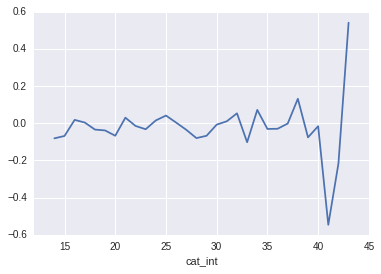

In [37]:
#compute Pearson's correlation per group:
live['cat_int'] = live.age_cat.astype(int)
groupy2 = live.groupby('cat_int')

group_size = groupy2.size()
#Pearson correlation
age_mean = groupy2.agepreg.mean()
age_std = groupy2.agepreg.std()
age_mean = age_mean.fillna(0)



weight_mean = groupy2.totalwgt_lb.mean()
weight_std = groupy2.totalwgt_lb.std()
weight_mean = weight_mean.fillna(0)

def compute_pearson(x):
    return (x.agepreg-age_mean.ix[x.cat_int])*(x.totalwgt_lb-weight_mean.ix[x.cat_int])

live['Pearson_per_row'] = live.apply(lambda x : compute_pearson(x),axis=1)



pearson = live.groupby('cat_int',).sum()
pearson = pearson.fillna(0)
pearson['Pearson'] = pearson.Pearson_per_row/age_std.ix[pearson.index]/weight_std.ix[pearson.index]/group_size.ix[pearson.index]


pearson.Pearson.plot()




In [38]:

#compute Pearson for all data:

    #first the hard way:
live.head()

,agepreg,totalwgt_lb,age_cat,rounded_weight,cat_int,Pearson_per_row
9193,27.16,0.1250,28,0.1,28,2.650299
12788,17.08,0.3125,18,0.3,18,3.349163
1041,29.25,0.4375,30,0.4,30,2.054299
7800,37.25,0.6250,38,0.6,38,1.568052
5411,35.91,0.6250,36,0.6,36,-2.631700


In [39]:
pearson = np.dot(live.agepreg-live.agepreg.mean(),live.totalwgt_lb-live.totalwgt_lb.mean())

pearson /= (live.agepreg.std()*live.totalwgt_lb.std())
pearson /=  live.shape[0]
print pearson

0.0688263542919


In [61]:
live.corr(method='pearson')

,agepreg,totalwgt_lb,rounded_weight,cat_int,Pearson_per_row
agepreg,1.000000,0.068834,0.068546,0.998659,-0.001483
totalwgt_lb,0.068834,1.000000,0.999806,0.069951,0.002188
rounded_weight,0.068546,0.999806,1.000000,0.069644,0.002278
cat_int,0.998659,0.069951,0.069644,1.000000,-0.000207
Pearson_per_row,-0.001483,0.002188,0.002278,-0.000207,1.000000


In [62]:
live.corr(method='spearman')

,agepreg,totalwgt_lb,rounded_weight,cat_int,Pearson_per_row
agepreg,1.000000,0.094610,0.094381,0.998581,0.016145
totalwgt_lb,0.094610,1.000000,0.999790,0.095759,0.005530
rounded_weight,0.094381,0.999790,1.000000,0.095519,0.005667
cat_int,0.998581,0.095759,0.095519,1.000000,0.015368
Pearson_per_row,0.016145,0.005530,0.005667,0.015368,1.000000
